In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Admission_Predict.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [5]:
##Renaming the columns just to make analysis easy
df.rename(columns={
    'GRE Score': 'GRE_Score',
    'TOEFL Score': 'TOEFL_Score',
    'University Rating': 'University_Rating',
    'Chance of Admit': 'Chance_of_Admit'
}, inplace=True)

In [6]:
## Handling missing values
df.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
print(df.columns)

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
X=df.iloc[:,1:-1]
y=df['Chance_of_Admit']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100)
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)

from sklearn.metrics import r2_score
r1=r2_score(y_test,y_predict)
print("R2_score ",r1)

R2_score  0.8066109143406879


In [11]:
print("Shape of testing data:", X_test.shape)

Shape of testing data: (100, 7)


In [12]:
adjusted_r2 = 1-(1-r1)*(len(X_test)-1)/(len(X_test)-7-1)
print("Adjusted R2 Score:", adjusted_r2 )

Adjusted R2 Score: 0.7918965273883489


# Forward selection

##The mlxtend library(Machine Learning eXtensions) is a Python package that provides tools for machine learning, including feature selection, sequential feature selection, and other utilities, extending functionality beyond scikit-learn.

In [13]:
from mlxtend.feature_selection import  SequentialFeatureSelector as sfs
##from mlxtend.feature_selection.sequential_feature_selector import SequentialFeatureSelector as sfs

model = sfs(RandomForestRegressor(),k_features=5,forward=True,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(5, 5),
                          n_jobs=-1, scoring='r2')

- RandomForestRegressor(): The machine learning model used for feature selection, in this case, a RandomForestRegressor.

- k_features=5: The number of features to select during the sequential feature selection process.

- forward=True: Specifies forward feature selection, where features are added one at a time based on their performance.

- cv=5: The number of cross-validation folds used for evaluating feature subsets.

- n_jobs=-1: Utilizes all available CPU cores for parallel execution, speeding up the feature selection process.

- scoring='r2': The evaluation metric used for ranking features; in this case, it's the coefficient of determination (R-squared).

In [14]:
##Get the selected features index
model.k_feature_idx_

(0, 2, 3, 4, 5)

In [15]:
##Get the column names for selected features features
model.k_feature_names_

('GRE_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA')

In [27]:
data=pd.DataFrame.from_dict(model.get_metric_dict()).T
data[["feature_idx","avg_score"]] 

,feature_idx,avg_score
1,"(5,)",0.65898
2,"(0, 5)",0.707667
3,"(0, 4, 5)",0.732664
4,"(0, 3, 4, 5)",0.742578
5,"(0, 2, 3, 4, 5)",0.745617


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

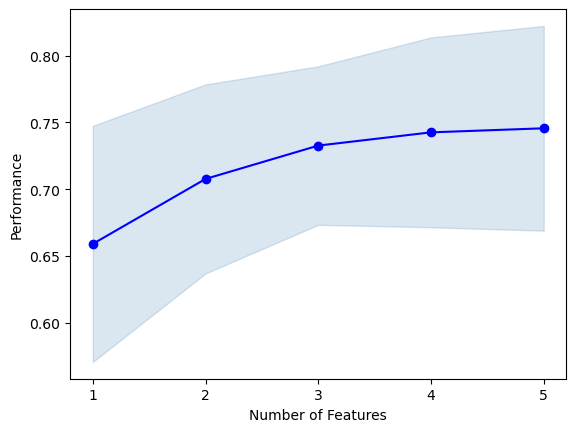

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(model.get_metric_dict(),kind='std_dev')

- model.get_metric_dict(): Retrieves a dictionary containing information about the performance metrics of the feature selection process.
- pd.DataFrame : Creates a Pandas DataFrame from the dictionary, where each row corresponds to a feature subset, and columns contain various metrics.
- The from_dict() method is used to create a Pandas DataFrame from a dictionary
- .T: Transposes the DataFrame, swapping rows and columns.
- data[...]: Indexes the DataFrame data to select specific columns.
- ["feature_idx", "avg_score"]: Selects the columns named "feature_idx" and "avg_score" from the DataFrame.
##feature_idx: tuple of the indices of featuresubset <br>
##avg_score: of cv average scores

In [18]:
## These are the best suited columns for prediction as per Forward Feature Selection
## Let's create the model

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


In [20]:
X=df.loc[:,['GRE_Score', 'SOP', 'LOR', 'CGPA', 'Research']]
y=df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100) ##object creation ,taking 100 decision trees in random forest
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
print("R2_score ",r2)

R2_score  0.801211728788085


In [21]:
## from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [22]:
print("Shape of testing data:", X_test.shape)

Shape of testing data: (100, 5)


In [23]:
adjusted_r2 = 1-(1-r1)*(len(X_test)-1)/(len(X_test)-7-1)
print("Adjusted R2 Score:", adjusted_r2 )

Adjusted R2 Score: 0.7918965273883489


# Backward elimination

In [24]:
from mlxtend.feature_selection import  SequentialFeatureSelector as sfs

b_model = sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
b_model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished

[2023-11-21 07:03:35] Features: 4/4 -- score: 0.7384192460359535

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=(4, 4), n_jobs=-1, scoring='r2',
                          verbose=2)

- RandomForestRegressor(): The machine learning model used for feature selection, a RandomForestRegressor.

- k_features=4: Specifies the number of features to select during the feature selection process, set to 4.

- forward=False: Specifies backward feature elimination (instead of forward), where features are removed iteratively.

- verbose=2: Controls the verbosity of the output during feature selection, with a higher value (2) providing more detailed information.

- cv=5: Sets the number of cross-validation folds used for evaluating feature subsets to 5.

- n_jobs=-1: Utilizes all available CPU cores for parallel execution, potentially speeding up the feature selection process.

- scoring='r2': Specifies the evaluation metric used for ranking features, in this case, the coefficient of determination (R-squared).






In [71]:
##Get the selected features index
b_model.k_feature_idx_

(0, 1, 2, 3)

In [29]:
##Get the column names for selected features features
X.columns[list(b_model.k_feature_idx_)]

Index(['GRE_Score', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [73]:
data=pd.DataFrame.from_dict(model.get_metric_dict()).T
data[["feature_idx","avg_score"]] 

,feature_idx,avg_score
1,"(5,)",0.66138
2,"(0, 5)",0.706554
3,"(0, 4, 5)",0.733886
4,"(0, 3, 4, 5)",0.739189
5,"(0, 3, 4, 5, 6)",0.744652


In [74]:
##Let's create the model

In [75]:
X=df.loc[:,['GRE_Score', 'SOP', 'LOR', 'CGPA']]
y=df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100) ##object creation ,taking 100 decision trees in random forest
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)

from sklearn.metrics import r2_score
r3=r2_score(y_test,y_predict)
print("R2_score ",r3)

R2_score  0.804753376127194


In [76]:
print("Shape of testing data:", X_test.shape)

Shape of testing data: (100, 4)


In [77]:
adjusted_r2 = 1-(1-r1)*(len(X_test)-1)/(len(X_test)-7-1)
print("Adjusted R2 Score:", adjusted_r2 )

Adjusted R2 Score: 0.7908878008544442


# Exhaustive Backward elimination

In [78]:
from mlxtend.feature_selection import  ExhaustiveFeatureSelector as efs

ex_model = efs(RandomForestRegressor(),min_features=2,max_features=4,n_jobs=-1,scoring='r2')
ex_model.fit(X,y)

Features: 11/11

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(),
                          feature_groups=[[0], [1], [2], [3]], max_features=4,
                          min_features=2, n_jobs=-1, scoring='r2')

- RandomForestRegressor(): The machine learning model used for feature selection, a RandomForestRegressor.

- min_features=2: Specifies the minimum number of features to select during the feature selection process, set to 2.

- max_features=4: Specifies the maximum number of features to select during the feature selection process, set to 4.

- n_jobs=-1: Utilizes all available CPU cores for parallel execution, potentially speeding up the feature selection process.

- scoring='r2': Specifies the evaluation metric used for ranking features, in this case, the coefficient of determination (R-squared)

In [79]:
##Get the selected features index
ex_model.best_idx_

(0, 1, 2, 3)

In [80]:
##Get the column names for selected features features
X.columns[list(ex_model.best_idx_)]

Index(['GRE_Score', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [81]:
X=df.loc[:,['GRE_Score', 'SOP', 'LOR', 'CGPA']]
y=df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100) ##object creation ,taking 100 decision trees in random forest
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)

from sklearn.metrics import r2_score
r4=r2_score(y_test,y_predict)
print("R2_score ",r4)

R2_score  0.7994664535022384


In [82]:
print("Shape of testing data:", X_test.shape)

Shape of testing data: (100, 4)


In [83]:
adjusted_r2 = 1-(1-r1)*(len(X_test)-1)/(len(X_test)-7-1)
print("Adjusted R2 Score:", adjusted_r2 )

Adjusted R2 Score: 0.7908878008544442


# Recursive backward elimination

In [84]:
from sklearn.feature_selection import RFE
RFE_model = RFE(RandomForestRegressor(), n_features_to_select=5, step=1)
RFE_model.fit(X,y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=5)

- RandomForestRegressor(): The base estimator, in this case, a RandomForestRegressor, is the machine learning model used for feature ranking and selection.

- n_features_to_select=5: Specifies the number of features to select in each iteration of the RFE process; in this example, it's set to 5.

- step=1: The number of features to remove at each iteration. In this case, 1 feature is eliminated in each step of the recursive elimination process.

In [85]:
##Get the selected features index
ex_model.best_idx_

(0, 1, 2, 3)

In [86]:
##Get the column names for selected features features
X.columns[list(RFE_model.support_)]

Index(['GRE_Score', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [87]:
X=df.loc[:,['GRE_Score', 'SOP', 'LOR', 'CGPA']]
y=df['Chance_of_Admit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor(n_estimators=100) ##object creation ,taking 100 decision trees in random forest
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)

from sklearn.metrics import r2_score
r5=r2_score(y_test,y_predict)
print("R2_score ",r5)

R2_score  0.7999368979068626


In [88]:
print("Shape of testing data:", X_test.shape)

Shape of testing data: (100, 4)


In [89]:
adjusted_r2 = 1-(1-r1)*(len(X_test)-1)/(len(X_test)-7-1)
print("Adjusted R2 Score:", adjusted_r2 )

Adjusted R2 Score: 0.7908878008544442


 The main difference lies in their approaches to selecting features:
### Exhaustive Feature Elimination:
- Approach: Evaluates all possible feature subsets.
- Method: Exhaustively searches through all combinations of features.
- Process: Trains and evaluates models with different feature subsets.
- Computational Cost: Can be high, especially as the number of features increases.
- Criterion: Identifies the subset that produces the best performance based on a specified criterion.
- Recursive Feature Elimination (RFE):
### Recursive Feature Elimination (RFE):
- Approach: Iteratively eliminates the least important features.
- Method: Starts with all features and removes them one by one.
- Process: Trains models, ranks features, and eliminates the least important in each iteration.
- Computational Cost: Typically lower than exhaustive methods.
- Criterion: Features are eliminated based on their importance, often determined by model coefficients or feature importances.

In summary, exhaustive elimination evaluates all possible combinations of features, while recursive elimination iteratively removes the least important features. The former can be computationally expensive, while the latter is more efficient and often relies on feature importance rankings.

### Pros
- Aim to find the best possible feature combination which helps model for good combination
- Better result than filter method
- can be used for small datasets and less features.

### Cons
- computationally expensive
- Often impractiable for large dataset having more features